## Clustering with Kmeans

We have prepared a toy dataset with three very prominent clusters (yet no labels) to explore how Kmeans clustering works.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

sns.set_theme(style='whitegrid',palette='tab10')

# Load the data
data = pd.read_csv('assets/clustering_simple.csv')
data

x         y
0    0.110185  0.809725
1    0.136211  0.756997
2    0.110625  0.667358
3    0.084505  0.744346
4    0.124494  0.689767
..        ...       ...
148  0.632632  0.518092
149  0.683863  0.472753
150  0.805576  0.346507
151  0.774498  0.477356
152  0.862596  0.509335

[153 rows x 2 columns]

<Axes: xlabel='x', ylabel='y'>

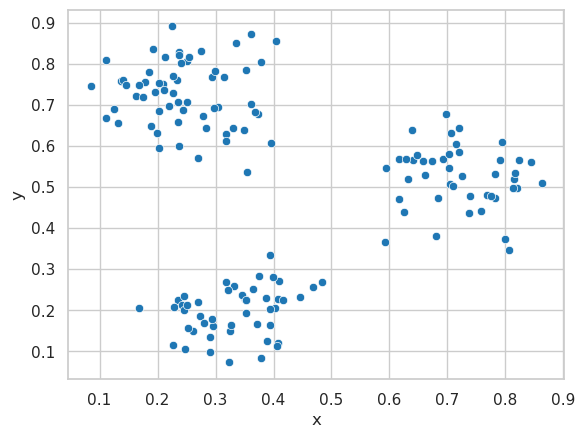

In [2]:
sns.scatterplot(data=data, x='x', y='y')

## K-means

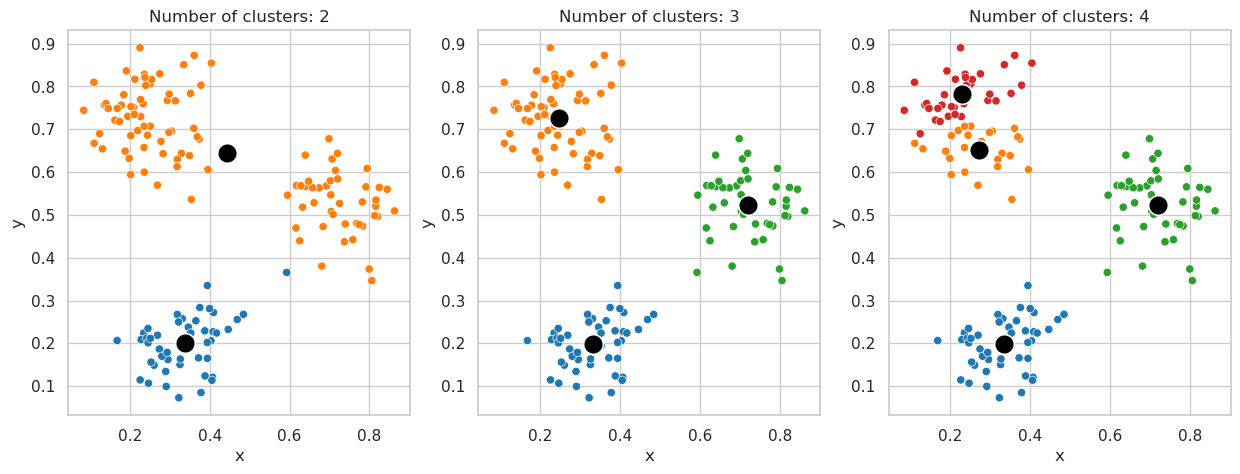

In [3]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
for ix, n_clusters in enumerate([2,3,4]):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    sns.scatterplot(data=data, x='x', y='y', hue=kmeans.labels_, ax=ax[ix], palette='tab10', legend=False)
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], ax=ax[ix], color="black", s=200)
    ax[ix].set_title(f'Number of clusters: {n_clusters}')

## How to determine the number of clusters?

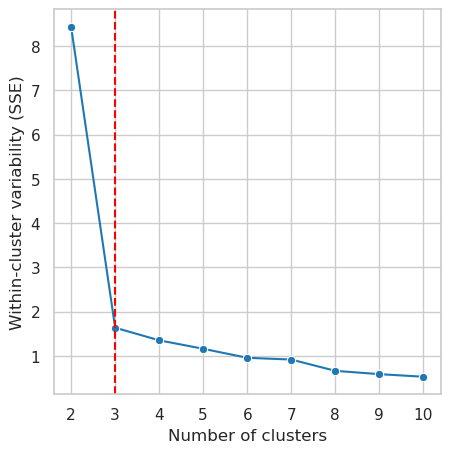

In [4]:
## Elbow method - scree plot
sse = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    # within-cluster variability (sum of square distances of each point to its cluster center)
    sse.append(kmeans.inertia_)

fig, ax = plt.subplots(1,1,figsize=(5,5))
sns.lineplot(x=range(2,11), y=sse, ax=ax, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Within-cluster variability (SSE)')
ax.set_xticks(range(2,11))
# vertical line at the elbow point
ax.axvline(x=3, color='red', linestyle='--') # 3 clusters


The silhouette index measures how similar an observation is to its own cluster compared to other clusters. It ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. Because it takes into account within and between-cluster variability, the silhouette index, unlike within-cluster variability, does not necessarily increase with the number of clusters - at some point it typically starts decreasing.

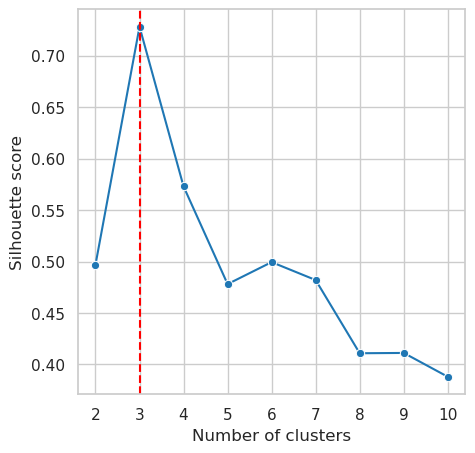

In [5]:
## Silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

fig, ax = plt.subplots(1,1,figsize=(5,5))
sns.lineplot(x=range(2,11), y=silhouette_scores, ax=ax, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(range(2,11))
# vertical line at max silhouette score
ax.axvline(x=3, color='red', linestyle='--') # 3 clusters


Questions:
- Can you think of an example dataset where Kmeans would fail?
- What are some of the ways we could improve/initialize the placement of the centroids?
- Can you think of an example where using a mean of the cluster would not be appropriate? Think about the properties of the mean and what Kmeans assumes for the distribution of the data in your clusters.
- When the mean is not appropriate, you can consider using [KMedoids](https://en.wikipedia.org/wiki/K-medoids).